In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496


In [4]:
test.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,PF00001001,DSK00001001,OFF00001001,A,20040720,171831000.0,T,0.02074,USD,2.332216,1.715337e+08,20040720,NaN,20040812,A,NaN,NaN
1,PF00001004,DSK00001003,OFF00001002,B,20040723,56485000.0,T,0.02074,USD,2.332216,5.638038e+07,20040723,NaN,20040719,B,NaN,NaN
2,PF00001009,DSK00001007,OFF00001001,A,20040607,41734000.0,T,0.02074,USD,2.332216,4.166179e+07,20040726,NaN,20040709,A,NaN,NaN
3,PF00001013,DSK00001011,OFF00001001,A,20040716,82951000.0,T,0.02074,USD,2.332216,8.250936e+07,20040726,NaN,20041019,A,NaN,NaN
4,PF00001014,DSK00001012,OFF00001001,A,20040713,73293000.0,T,0.02074,USD,2.332216,7.317055e+07,20040726,NaN,20040813,A,NaN,NaN


In [3]:
train=train.iloc[:,3:]
test=test.iloc[:,3:]

In [8]:
train.head()

,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496


In [9]:
test.head()

,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,A,20040720,171831000.0,T,0.02074,USD,2.332216,1.715337e+08,20040720,NaN,20040812,A,NaN,NaN
1,B,20040723,56485000.0,T,0.02074,USD,2.332216,5.638038e+07,20040723,NaN,20040719,B,NaN,NaN
2,A,20040607,41734000.0,T,0.02074,USD,2.332216,4.166179e+07,20040726,NaN,20040709,A,NaN,NaN
3,A,20040716,82951000.0,T,0.02074,USD,2.332216,8.250936e+07,20040726,NaN,20041019,A,NaN,NaN
4,A,20040713,73293000.0,T,0.02074,USD,2.332216,7.317055e+07,20040726,NaN,20040813,A,NaN,NaN


In [11]:
train.describe()

,start_date,sold,euribor_rate,libor_rate,bought,creation_date,sell_date,return
count,9.366000e+03,9.364000e+03,9366.000000,8892.000000,9.364000e+03,9.366000e+03,9.366000e+03,9366.000000
mean,2.011706e+07,1.019740e+08,0.009383,0.998066,1.018914e+08,2.011706e+07,2.011770e+07,0.014100
std,3.052996e+04,1.928066e+08,0.013298,1.457977,1.927472e+08,3.052372e+04,3.060900e+04,0.020549
min,2.004041e+07,1.100000e+00,-0.003740,-0.667095,1.099698e+00,2.004072e+07,2.004071e+07,-0.009600
25%,2.010020e+07,2.763200e+07,0.000980,0.244490,2.761285e+07,2.010020e+07,2.010023e+07,0.003000
50%,2.011120e+07,5.517050e+07,0.004390,0.531983,5.512056e+07,2.011120e+07,2.011121e+07,0.005400
75%,2.014071e+07,1.144632e+08,0.013510,1.109959,1.144459e+08,2.014071e+07,2.014083e+07,0.014520
max,2.017103e+07,1.320000e+10,0.050880,6.379137,1.320000e+10,2.017103e+07,2.017103e+07,0.778441


In [12]:
test.describe()

,start_date,sold,euribor_rate,libor_rate,bought,creation_date,sell_date
count,4.801000e+03,4.801000e+03,4801.000000,4536.000000,4.801000e+03,4.801000e+03,4.801000e+03
mean,2.011849e+07,1.024942e+08,0.008717,0.930464,1.024165e+08,2.011849e+07,2.011911e+07
std,2.992170e+04,1.356065e+08,0.012747,1.387474,1.355206e+08,2.991692e+04,3.005556e+04
min,2.004061e+07,1.100000e+00,-0.003740,-0.667095,1.099989e+00,2.004072e+07,2.004071e+07
25%,2.010052e+07,2.891900e+07,0.000970,0.240305,2.891866e+07,2.010053e+07,2.010061e+07
50%,2.012010e+07,5.725500e+07,0.004250,0.531493,5.725304e+07,2.012010e+07,2.012011e+07
75%,2.014083e+07,1.210000e+08,0.013320,1.065318,1.209652e+08,2.014083e+07,2.014100e+07
max,2.017103e+07,1.560212e+09,0.050880,6.434407,1.560168e+09,2.017103e+07,2.017103e+07


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 15 columns):
pf_category       9366 non-null object
start_date        9366 non-null int64
sold              9364 non-null float64
country_code      9366 non-null object
euribor_rate      9366 non-null float64
currency          9366 non-null object
libor_rate        8892 non-null float64
bought            9364 non-null float64
creation_date     9366 non-null int64
indicator_code    3667 non-null object
sell_date         9366 non-null int64
type              9366 non-null object
hedge_value       3665 non-null object
status            6282 non-null object
return            9366 non-null float64
dtypes: float64(5), int64(3), object(7)
memory usage: 1.1+ MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 14 columns):
pf_category       4801 non-null object
start_date        4801 non-null int64
sold              4801 non-null float64
country_code      4801 non-null object
euribor_rate      4801 non-null float64
currency          4801 non-null object
libor_rate        4536 non-null float64
bought            4801 non-null float64
creation_date     4801 non-null int64
indicator_code    1950 non-null object
sell_date         4801 non-null int64
type              4801 non-null object
hedge_value       1950 non-null object
status            3344 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 525.2+ KB


In [15]:
train.dtypes

pf_category        object
start_date          int64
sold              float64
country_code       object
euribor_rate      float64
currency           object
libor_rate        float64
bought            float64
creation_date       int64
indicator_code     object
sell_date           int64
type               object
hedge_value        object
status             object
return            float64
dtype: object

In [17]:
test.dtypes

pf_category        object
start_date          int64
sold              float64
country_code       object
euribor_rate      float64
currency           object
libor_rate        float64
bought            float64
creation_date       int64
indicator_code     object
sell_date           int64
type               object
hedge_value        object
status             object
dtype: object

## 1. Data Preprocessing

### 1.1 Missing Values Handling

In [19]:
train.isnull().sum()

pf_category          0
start_date           0
sold                 2
country_code         0
euribor_rate         0
currency             0
libor_rate         474
bought               2
creation_date        0
indicator_code    5699
sell_date            0
type                 0
hedge_value       5701
status            3084
return               0
dtype: int64

In [20]:
test.isnull().sum()

pf_category          0
start_date           0
sold                 0
country_code         0
euribor_rate         0
currency             0
libor_rate         265
bought               0
creation_date        0
indicator_code    2851
sell_date            0
type                 0
hedge_value       2851
status            1457
dtype: int64

#### Sold(Drop Missing Values)

In [28]:
train.sold.dropna(inplace=True)

In [29]:
train.sold.isnull().sum()

0

#### Libor_Rate( Imputing With Mean)

In [4]:
train.libor_rate=train.libor_rate.fillna(train.libor_rate.mean())

In [5]:
test.libor_rate=test.libor_rate.fillna(train.libor_rate.mean())

In [6]:
train.libor_rate.isnull().sum()

0

In [33]:
test.libor_rate.isnull().sum()

0

#### Indicator_Code (Imputed with "-999" value)

In [47]:
type(train.indicator_code[9336])

bool

In [7]:
train.indicator_code=train.indicator_code.fillna(-999)

In [8]:
test.indicator_code=test.indicator_code.fillna(-999)

In [50]:
type(train.indicator_code[0])

int

In [51]:
test.indicator_code.isnull().sum()

0

In [52]:
train.indicator_code.isnull().sum()

0

#### Hedge Values (Imputed with False)

In [9]:
train.hedge_value=train.hedge_value.fillna(False)

In [10]:
test.hedge_value=test.hedge_value.fillna(False)

In [57]:
train.hedge_value.isnull().sum()

0

In [58]:
test.hedge_value.isnull().sum()

0

#### Status (Imputed with False)

In [11]:
train.status=train.status.fillna(False)

In [12]:
test.status=test.status.fillna(False)

In [63]:
train.status.isnull().sum()

0

In [66]:
train.isnull().sum()

pf_category       0
start_date        0
sold              2
country_code      0
euribor_rate      0
currency          0
libor_rate        0
bought            2
creation_date     0
indicator_code    0
sell_date         0
type              0
hedge_value       0
status            0
return            0
dtype: int64

In [67]:
test.isnull().sum()

pf_category       0
start_date        0
sold              0
country_code      0
euribor_rate      0
currency          0
libor_rate        0
bought            0
creation_date     0
indicator_code    0
sell_date         0
type              0
hedge_value       0
status            0
dtype: int64

In [68]:
train.dropna(inplace=True)

## 1.2 Label Encoding for Categorical Variables

In [70]:
train.head()

,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,-999,20040812,B,False,False,0.02496
1,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,-999,20040812,C,False,False,0.05496
2,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,-999,20040817,A,False,False,0.02496
3,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,-999,20040713,A,False,False,0.02496
4,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,-999,20040713,B,False,False,0.02496


In [13]:
pf_cat={"A":0,"B":1,"C":2,"D":3,"E":4}
cc={"M":0,"N":1,"T":2,"U":3,"Z":4}
typ={"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6,"H":7}
hedge={True:1,False:0}
stat={True:1,False:0}
indi={True:1,-999:-999}

In [14]:
train.pf_category=train.pf_category.apply(lambda x: pf_cat[x])
test.pf_category=test.pf_category.apply(lambda x: pf_cat[x])

In [15]:
train.country_code=train.country_code.apply(lambda x: cc[x])
test.country_code=test.country_code.apply(lambda x: cc[x])

In [16]:
train.type=train.type.apply(lambda x: typ[x])
test.type=test.type.apply(lambda x: typ[x])

In [17]:
train.hedge_value=train.hedge_value.apply(lambda x: hedge[x])
test.hedge_value=test.hedge_value.apply(lambda x: hedge[x])

In [18]:
train.status=train.status.apply(lambda x: stat[x])
test.status=test.status.apply(lambda x: stat[x])

In [19]:
train.indicator_code=train.indicator_code.apply(lambda x: indi[x])
test.indicator_code=test.indicator_code.apply(lambda x: indi[x])

In [20]:
train.head()

,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,1,20040720,110000000.0,2,0.02074,USD,2.332216,1.098097e+08,20040720,-999,20040812,1,0,0,0.02496
1,0,20040709,176671000.0,1,0.02074,GBP,5.269617,1.760084e+08,20040723,-999,20040812,2,0,0,0.05496
2,0,20040723,56474000.0,2,0.02074,USD,2.332216,5.637953e+07,20040723,-999,20040817,0,0,0,0.02496
3,0,20040609,164813000.0,2,0.02074,USD,2.332216,1.645088e+08,20040723,-999,20040713,0,0,0,0.02496
4,1,20040609,140800000.0,2,0.02074,USD,2.332216,1.405402e+08,20040723,-999,20040713,1,0,0,0.02496


### 1.3 Taking Care of Date_Time Objects

In [21]:
train.start_date=pd.to_datetime(train.start_date,format='%Y%m%d', errors='ignore')
test.start_date=pd.to_datetime(test.start_date,format='%Y%m%d', errors='ignore')

In [22]:
train.creation_date=pd.to_datetime(train.creation_date,format='%Y%m%d', errors='ignore')
test.creation_date=pd.to_datetime(test.creation_date,format='%Y%m%d', errors='ignore')

In [23]:
test.sell_date=pd.to_datetime(test.sell_date,format='%Y%m%d', errors='ignore')
train.sell_date=pd.to_datetime(train.sell_date,format='%Y%m%d', errors='ignore')

In [24]:
train.head(2)

,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,1,2004-07-20,110000000.0,2,0.02074,USD,2.332216,1.098097e+08,2004-07-20,-999,2004-08-12,1,0,0,0.02496
1,0,2004-07-09,176671000.0,1,0.02074,GBP,5.269617,1.760084e+08,2004-07-23,-999,2004-08-12,2,0,0,0.05496


In [25]:
train.dtypes

pf_category                int64
start_date        datetime64[ns]
sold                     float64
country_code               int64
euribor_rate             float64
currency                  object
libor_rate               float64
bought                   float64
creation_date     datetime64[ns]
indicator_code             int64
sell_date         datetime64[ns]
type                       int64
hedge_value                int64
status                     int64
return                   float64
dtype: object

In [89]:
train.dtypes

pf_category                int64
start_date        datetime64[ns]
sold                     float64
country_code               int64
euribor_rate             float64
currency                  object
libor_rate               float64
bought                   float64
creation_date     datetime64[ns]
indicator_code             int64
sell_date         datetime64[ns]
type                       int64
hedge_value                int64
status                     int64
return                   float64
dtype: object

## 2. Feature Engineering

In [90]:
train.head()

,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,1,2004-07-20,110000000.0,2,0.02074,USD,2.332216,1.098097e+08,2004-07-20,-999,2004-08-12,1,0,0,0.02496
1,0,2004-07-09,176671000.0,1,0.02074,GBP,5.269617,1.760084e+08,2004-07-23,-999,2004-08-12,2,0,0,0.05496
2,0,2004-07-23,56474000.0,2,0.02074,USD,2.332216,5.637953e+07,2004-07-23,-999,2004-08-17,0,0,0,0.02496
3,0,2004-06-09,164813000.0,2,0.02074,USD,2.332216,1.645088e+08,2004-07-23,-999,2004-07-13,0,0,0,0.02496
4,1,2004-06-09,140800000.0,2,0.02074,USD,2.332216,1.405402e+08,2004-07-23,-999,2004-07-13,1,0,0,0.02496


### 2.1 Converting All Currencies into Same Scale(in US Dollar)

In [26]:
def Currency_Converter(data):
    cur=data[0]
    x=data[1]
    if cur=="USD":
        return(x)
    elif cur=="GBP":
        return(x*1.3)
    elif cur=="EUR":
        return (x*1.2)
    elif cur=="CHF":
        return(x)
    elif cur=="JPY":
        return(x*0.008)

#### Sold

In [27]:
train.sold=train[["currency","sold"]].apply(Currency_Converter,axis=1)
test.sold=test[["currency","sold"]].apply(Currency_Converter,axis=1)

#### Bought

In [28]:
train.bought=train[["currency","bought"]].apply(Currency_Converter,axis=1)
test.bought=test[["currency","bought"]].apply(Currency_Converter,axis=1)

#### Euribor Rate

In [29]:
train.euribor_rate=train[["currency","euribor_rate"]].apply(Currency_Converter,axis=1)
test.euribor_rate=test[["currency","euribor_rate"]].apply(Currency_Converter,axis=1)

#### Libor_Rate

In [30]:
train.libor_rate=train[["currency","libor_rate"]].apply(Currency_Converter,axis=1)
test.libor_rate=test[["currency","libor_rate"]].apply(Currency_Converter,axis=1)

In [31]:
train.head()

,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,1,2004-07-20,110000000.0,2,0.020740,USD,2.332216,1.098097e+08,2004-07-20,-999,2004-08-12,1,0,0,0.02496
1,0,2004-07-09,229672300.0,1,0.026962,GBP,6.850502,2.288110e+08,2004-07-23,-999,2004-08-12,2,0,0,0.05496
2,0,2004-07-23,56474000.0,2,0.020740,USD,2.332216,5.637953e+07,2004-07-23,-999,2004-08-17,0,0,0,0.02496
3,0,2004-06-09,164813000.0,2,0.020740,USD,2.332216,1.645088e+08,2004-07-23,-999,2004-07-13,0,0,0,0.02496
4,1,2004-06-09,140800000.0,2,0.020740,USD,2.332216,1.405402e+08,2004-07-23,-999,2004-07-13,1,0,0,0.02496


### 2.2 Taking Care of Currency Column

Here, Only "USD" currency will have value 1 and other currencies will have 0 values 

In [32]:
def cur(data):
    if data=="USD":
        return(1)
    else:
        return(0)


In [33]:
train.currency=train.currency.apply(lambda x: cur(x))
test.currency=test.currency.apply(lambda x: cur(x))

### 2.3 Taking Care of Outliers Present in Bought and Sold Column

### Sold

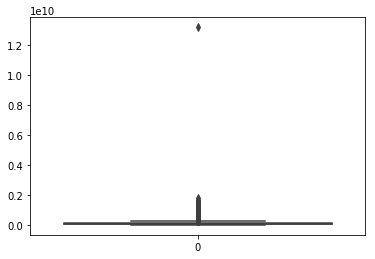

In [35]:
sns.boxplot(data=train.sold)

In [36]:
from scipy.stats.mstats import winsorize 

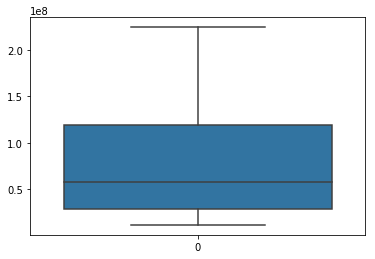

In [37]:
sns.boxplot(data=(winsorize(a=train.sold,limits=0.1)))

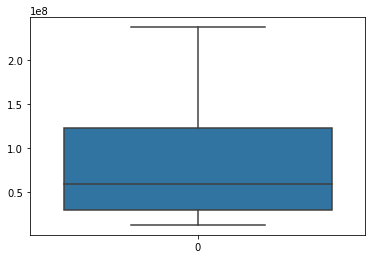

In [38]:
sns.boxplot(data=(winsorize(a=test.sold,limits=0.1)))

So, 10% clipping is working fine for both Train and Test data 

In [39]:
winsorize(a=train.sold,limits=0.1,inplace=True)

masked_array(data = [  1.10000000e+08   2.24488000e+08   5.64740000e+07 ...,   1.10000000e+08
   3.30000000e+07   8.95620000e+07],
             mask = False,
       fill_value = 1e+20)

In [40]:
winsorize(a=test.sold,limits=0.1,inplace=True)

masked_array(data = [  1.71831000e+08   5.64850000e+07   4.17340000e+07 ...,   3.73516000e+07
   3.44190000e+07   5.37130000e+07],
             mask = False,
       fill_value = 1e+20)

### Bought

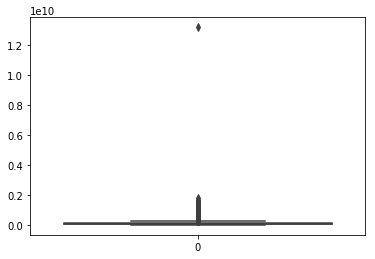

In [41]:
sns.boxplot(data=train.bought)

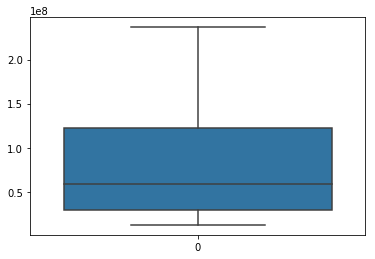

In [42]:
sns.boxplot(data=(winsorize(a=test.bought,limits=0.1)))

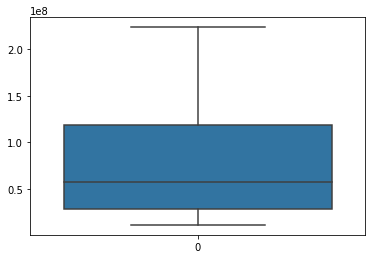

In [43]:
sns.boxplot(data=(winsorize(a=train.bought,limits=0.1)))

So, here also 10% clipping is working fine for both Train and Test data 

In [44]:
winsorize(a=test.bought,limits=0.1,inplace=True)

masked_array(data = [  1.71533675e+08   5.63803831e+07   4.16617862e+07 ...,   3.73480903e+07
   3.44159883e+07   5.37077779e+07],
             mask = False,
       fill_value = 1e+20)

In [45]:
winsorize(a=train.bought,limits=0.1,inplace=True)

masked_array(data = [  1.09809663e+08   2.23933335e+08   5.63795330e+07 ...,   1.09989306e+08
   3.29967917e+07   8.95532926e+07],
             mask = False,
       fill_value = 1e+20)

In [112]:
train.head()

,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,1,2004-07-20,110000000.0,2,0.020740,1,2.332216,1.098097e+08,2004-07-20,-999,2004-08-12,1,0,0,0.02496
1,0,2004-07-09,132503250.0,1,0.015555,0,3.952213,1.320063e+08,2004-07-23,-999,2004-08-12,2,0,0,0.05496
2,0,2004-07-23,56474000.0,2,0.020740,1,2.332216,5.637953e+07,2004-07-23,-999,2004-08-17,0,0,0,0.02496
3,0,2004-06-09,164813000.0,2,0.020740,1,2.332216,1.645088e+08,2004-07-23,-999,2004-07-13,0,0,0,0.02496
4,1,2004-06-09,140800000.0,2,0.020740,1,2.332216,1.405402e+08,2004-07-23,-999,2004-07-13,1,0,0,0.02496


## 2.4 New Feature Generation

Now, we will try to generate new features from our Datetime objects.


### 2.4.1 Start Day

This feature actually contains the days difference between Creation Date and Start Date.
* and it is calculated by usuing - (Difference in Years) x 365 + (Difference in Months) x30 + (Difference in Days) this formula.


In [46]:
train["start_day"]=(train.creation_date.dt.year-train.start_date.dt.year)*365+(train.creation_date.dt.month-train.start_date.dt.month)*30+(train.creation_date.dt.day-train.start_date.dt.day)
test["start_day"]=(test.creation_date.dt.year-test.start_date.dt.year)*365+(test.creation_date.dt.month-test.start_date.dt.month)*30+(test.creation_date.dt.day-test.start_date.dt.day)

### 2.4.2 Sell Day

This feature actually contains the days difference between Sell Date and Start Date.
* and it is calculated by usuing - (Difference in Years) x 365 + (Difference in Months) x30 + (Difference in Days) this formula.


In [47]:
train["sell_day"]=(train.sell_date.dt.year-train.start_date.dt.year)*365+(train.sell_date.dt.month-train.start_date.dt.month)*30+(train.sell_date.dt.day-train.start_date.dt.day)
test["sell_day"]=(test.sell_date.dt.year-test.start_date.dt.year)*365+(test.sell_date.dt.month-test.start_date.dt.month)*30+(test.sell_date.dt.day-test.start_date.dt.day)

### 2.4.3 Creation Day

This feature actually contains the days difference between Sell Date and Creation Date.
* and it is calculated by usuing - (Difference in Years) x 365 + (Difference in Months) x30 + (Difference in Days) this formula.


In [48]:
train["creation_day"]=(train.sell_date.dt.year-train.creation_date.dt.year)*365+(train.sell_date.dt.month-train.creation_date.dt.month)*30+(train.sell_date.dt.day-train.creation_date.dt.day)
test["creation_day"]=(test.sell_date.dt.year-test.creation_date.dt.year)*365+(test.sell_date.dt.month-test.creation_date.dt.month)*30+(test.sell_date.dt.day-test.creation_date.dt.day)

## Rearranging Columns

In [49]:
train=train[['pf_category','country_code','euribor_rate','currency',
       'libor_rate', 'bought',"sold",'indicator_code','type', 'hedge_value',"status",'start_day','sell_day',
       'creation_day','return', ]]

In [50]:
test=test[['pf_category','country_code','euribor_rate','currency',
       'libor_rate', 'bought',"sold",'indicator_code','type', 'hedge_value',"status",'start_day','sell_day',
       'creation_day' ]]

In [51]:
train.shape

(9366, 15)

In [52]:
test.shape

(4801, 14)

### Export to CSV files for further references. 

In [53]:
train.to_csv("Cleaned_Train_Data.csv",index=False)
test.to_csv("Cleaned_Test_Data.csv",index=False)

## 3. Modelling

In [54]:
train=pd.read_csv("Cleaned_Train_Data.csv")
test=pd.read_csv("Cleaned_Test_Data.csv")

In [55]:
X=train.iloc[:,:-1]
y=train['return']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [58]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [59]:
### Scoring Function
def Score(model,X_train,y_train,X_test,y_test,train=True):
    if train==True:
        print("Training Result \n")
        print("R Squared Value:  {0:0.4f} \n".format(r2_score(y_train,model.predict(X_train))))
        scores=cross_val_score(estimator=model,X=X_train,y=y_train,cv=15,scoring='r2',n_jobs=-1)
        print("Cross-Validation Score: \n",scores.mean())
        print("Standard Deviation: \n",scores.std())
    elif train==False:
        print("TestResult \n")
        print("R Squared Value:  {0:0.4f} \n".format(r2_score(y_test,model.predict(X_test))))
             

In [60]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

/home/tanmoy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
model_RF=RandomForestRegressor()
model_GBM=GradientBoostingRegressor()
model_XGB=XGBRegressor()

### Random Forest Model

In [62]:
model_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
Score(model_RF,X_train,y_train,X_test,y_test,train=True)

Training Result 

R Squared Value:  0.9296 

Cross-Validation Score: 
 0.829297691804
Standard Deviation: 
 0.274284960562


In [64]:
Score(model_RF,X_train,y_train,X_test,y_test,train=False)

TestResult 

R Squared Value:  0.9690 



### Hypermeter Tuning of Random Forest Model

In [65]:
param_grid_RF= {
              "n_estimators": [10,100,150],
              "max_depth":[2,5,10],
              "min_samples_split":[10,100,200],
              "min_samples_leaf":[10,50],
               }

In [66]:
from sklearn.grid_search import GridSearchCV

/home/tanmoy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [67]:
grid_search=GridSearchCV(estimator=model_RF,param_grid=param_grid_RF,cv=10,n_jobs=-1)

In [68]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 100, 150], 'max_depth': [2, 5, 10], 'min_samples_split': [10, 100, 200], 'min_samples_leaf': [10, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [69]:
grid_search.best_score_

0.8657786924757296

In [70]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 100,
 'n_estimators': 150}

In [71]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Final Random Forest Model

In [72]:
model_RF=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
model_RF.fit(sc.transform(X),y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
Score(model_RF,X_train,y_train,X_test,y_test,train=True)

Training Result 

R Squared Value:  0.7779 

Cross-Validation Score: 
 0.886331554424
Standard Deviation: 
 0.192185760096


In [75]:
Score(model_RF,X_train,y_train,X_test,y_test,train=False)

TestResult 

R Squared Value:  0.9639 



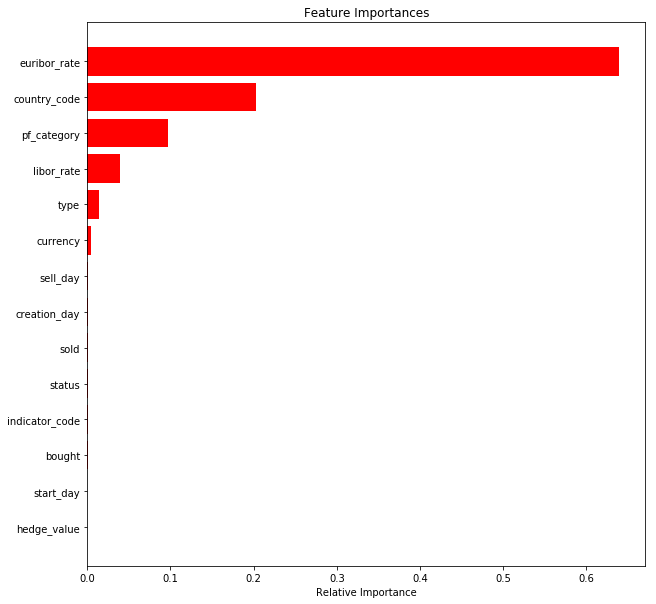

In [104]:
plt.figure(figsize=(10,10))
features =X.columns
importances = model_RF.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [103]:
pred_RF=model_RF.predict(sc.transform(test))

### GBM Model

In [77]:
model_GBM.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [78]:
Score(model_GBM,X_train,y_train,X_test,y_test,train=True)

Training Result 

R Squared Value:  0.7965 

Cross-Validation Score: 
 0.869681283379
Standard Deviation: 
 0.195093658828


In [79]:
Score(model_GBM,X_train,y_train,X_test,y_test,train=False)

TestResult 

R Squared Value:  0.9549 



### Hypermeter Tuning of GBM Model

In [81]:
param_grid_GBM= {
              "n_estimators": [10,100,150,200],
              "max_depth":[2,5,10],
              "min_samples_split":[10,100,200],
              "min_samples_leaf":[10,50],
               }

In [82]:
grid_search_GBM=GridSearchCV(estimator=model_GBM,param_grid=param_grid_GBM,cv=10,n_jobs=-1)

In [83]:
grid_search_GBM.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 100, 150, 200], 'max_depth': [2, 5, 10], 'min_samples_split': [10, 100, 200], 'min_samples_leaf': [10, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [84]:
grid_search_GBM.best_score_

0.8671154188456444

In [85]:
grid_search_GBM.best_params_

{'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 10,
 'n_estimators': 100}

In [86]:
grid_search_GBM.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=50,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### Final GBM

### GBM Model Parameters: Max Depth: 10,Min Sample Leaf: 50, Min Samples Split : 10, N Estimators: 100

In [87]:
model_GBM=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=50,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [88]:
model_GBM.fit(sc.transform(X),y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=50,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [89]:
Score(model_GBM,X_train,y_train,X_test,y_test,train=True)

Training Result 

R Squared Value:  0.8296 

Cross-Validation Score: 
 0.888563858595
Standard Deviation: 
 0.192520727302


In [90]:
Score(model_GBM,X_train,y_train,X_test,y_test,train=False)

TestResult 

R Squared Value:  0.9777 



In [91]:
pred_GBM=model_GBM.predict(sc.transform(test))

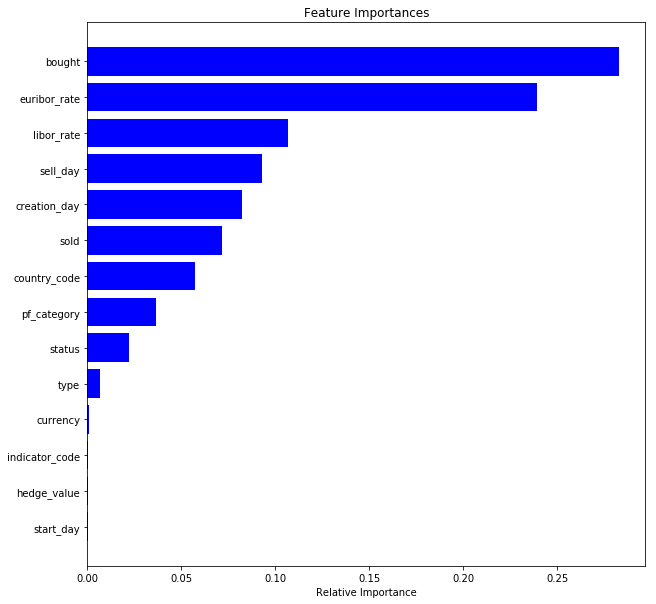

In [92]:
plt.figure(figsize=(10,10))
features =X.columns
importances = model_GBM.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')


## XGBoost

### Final XGBoost Parameters : Max Depth:10 , N Estimators : 100

In [93]:
model_XGB=XGBRegressor(max_depth=10,n_estimators=100)

In [94]:
model_XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [97]:
Score(model_XGB,X_train,y_train,X_test,y_test,train=False)

TestResult 

R Squared Value:  0.9972 



In [96]:
model_XGB.fit(sc.transform(X),y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [98]:
pred_XGB=model_XGB.predict(sc.transform(test))

### So, 60% weightage of XGBoost Model and 40% Weightage of GBM Model is ensembled for Final Submission. It gave accuracy near 0.97106(R Squared) on testdata. 

In [99]:
final_pred=(0.6*pred_XGB+0.4*pred_GBM)

## Submission

In [100]:
sub=pd.read_csv("sample_submission.csv")

In [187]:
sub.head()

,portfolio_id,return
0,PF00001001,0.079456
1,PF00001004,0.076026
2,PF00001009,0.058746
3,PF00001013,0.022700
4,PF00001014,0.036714


In [101]:
sub['return']=final_pred

In [105]:
sub.to_csv("Submission_XGB_GBM.csv",index=False)